1. 서울시 각 구별 cctv 수를 파악하고 인구대비 cctv 비율을 구해 순위 비교
2. 인구대비 cctv의 평균치를 확인하고 cctv가 과하게 부족한 구를 확인
3. 고령자 대비 cctv 비율
4. 외국인 대비 cctv 비율

- 사용 데이터 
- .서울시 지자체별 cctv 현황 data/01. CCTV_in_Seoul.csv
- .서울시 지자체별 인구 현황 data/01.population_in_Seoul.xls

In [1]:
# 필요모듈 import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# cctv데이터 읽어오기
# 판다스의 read_csv("경로를 포함한 파일명 ",encoding="인코딩명")함수를 통해 읽어오기
# 데이터에 한글이 포함되어 있는 경우 : 인코딩 방식을 설정 
CCTV_Seoul = pd.read_csv("../data/01. CCTV_in_Seoul.csv")
CCTV_Seoul.head()
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [6]:
# CCTV_Seoul df의 컬럼명을 확인해보기
# df.columns
CCTV_Seoul.columns
CCTV_Seoul.columns[0]

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

'기관명'

In [9]:
# 기관명 열이름의 전달력이 떨어져서 컬럼명 변경 : 기관명 -> 구별
# 컬럼명 변경 : df.rename(columns={바꿀위치:"변경할이름"}) -> 원본반영이 안됨
# df.rename(columns={바꿀위치:"변경할이름"},inplace=True) - > inplace=True : 원본변경

CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:"구별"},inplace=True)
CCTV_Seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [12]:
# 서울시 인구현황 데이터 가져오기 - 엑셀파일 읽어오기
# pd.read_excel("파일명")
pop_Seoul = pd.read_excel("../data/01.population_in_Seoul.xls")
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [16]:
#필요 data 만 가져오기, 자치구, 전체인구수,한국인,외국인,고령자(B,D,G,J,N)
#2행을 skip하고 3행을 header로 처리해서 가져오기

pop_Seoul = pd.read_excel('../data/01.population_in_Seoul.xls',header=2,usecols="B,D,G,J,N")
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [20]:
# 컬럼명 변경
#0: 구별
#1:인구수
#2:한국인
#3:외국인
#4:고령자
pop_Seoul.rename(columns={pop_Seoul.columns[0]:"구별",
                          pop_Seoul.columns[1]:"인구수",
                          pop_Seoul.columns[2]:"한국인",
                          pop_Seoul.columns[3]:"외국인",
                          pop_Seoul.columns[4]:"고령자"},inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


#### 각 데이터 파악하기
- CCTV_Seoul데이터 프레임, pop_Seoul 데이터프레임

In [21]:
# CCTV_Seoul 데이터프레임
CCTV_Seoul.head()
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [22]:
# pop_Seoul 데이터 프레임 확인
pop_Seoul.head()
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [25]:
# 정보(개요) 확인
CCTV_Seoul.info()
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구별         25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      26 non-null     object 
 1   인구수     26 non-null     float64
 2   한국인     26 non-null     float64
 3   외국인     26 non-null     float64
 4   고령자     26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [26]:
# 기본 통계량 확인 
CCTV_Seoul.describe()
pop_Seoul.describe()


,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1515.320000,764.760000,159.480000,205.200000,385.880000
std,616.774656,415.510257,104.132976,137.877059,182.479981
min,825.000000,238.000000,21.000000,30.000000,81.000000
25%,1010.000000,464.000000,78.000000,103.000000,292.000000
50%,1327.000000,573.000000,142.000000,184.000000,377.000000
75%,1884.000000,1070.000000,218.000000,269.000000,467.000000
max,3238.000000,1843.000000,430.000000,584.000000,932.000000


,인구수,한국인,외국인,고령자
count,2.600000e+01,2.600000e+01,26.000000,2.600000e+01
mean,7.844311e+05,7.636129e+05,20818.153846,1.016506e+05
std,1.924156e+06,1.873421e+06,51598.169516,2.491801e+05
min,1.332400e+05,1.243120e+05,2017.000000,2.076400e+04
25%,3.348055e+05,3.316718e+05,4489.000000,4.831200e+04
50%,4.135115e+05,4.051690e+05,9079.500000,5.439750e+04
75%,4.907855e+05,4.864445e+05,14901.500000,6.431075e+04
max,1.019760e+07,9.926968e+06,270636.000000,1.321458e+06


#### CCTV현황 확인



In [28]:
# 소계 컬럼을 활용해서 설치대수가 많은 구와 적은구를 확인 (5개구를 확인)
# 소계를 기준으로 정렬 후에 head() 이용해서 확인 
# 설치대수가 적은 5개 구 
CCTV_Seoul.sort_values(by="소계").head(5)

# 해석 : 도봉구가 가장 적은 CCTV를 보유. 그 뒤로 강북구, 광진구 순으로 적은 CCTV를 보유하고있음 

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [29]:
# 설치대수가 많은 5개 구  -> .sort_values(by="소계",ascending=False)
CCTV_Seoul.sort_values(by="소계",ascending=False).head(5)

# 해석 : 강남구가 가장 많은 CCTV를 보유. 그 뒤로 양천구, 서초구 순으로 나타남 

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


Data 상 최근 3개년 (2014~2016)동안 cctv가 얼마나 증가했는지 확인
- 각 연도별 cctv 대수는 해당년도에 설치한 대수를 의미
- CCTV_Seoul["최근증가율"]=(2014+2015+2016)/2013 * 100

In [33]:
CCTV_Seoul["최근증가율"] = (CCTV_Seoul["2014년"]+
                       CCTV_Seoul["2015년"]+CCTV_Seoul["2016년"])/CCTV_Seoul["2013년도 이전"]*100
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [39]:
# 최근 증가율이 높은 3개구를 확인 
CCTV_Seoul.sort_values(by="최근증가율",ascending=False).head(3)
CCTV_Seoul.sort_values(by="소계").head(3)
# 해석 : 도봉구에 설치된 CCTVT수는 가장 적지만 최근 3년동안 증가율은 높음(전체구 중에 2위)


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,825,238,159,42,386,246.638655
2,강북구,831,369,120,138,204,125.203252
5,광진구,878,573,78,53,174,53.228621


In [41]:
# 최근 증가율이 낮은 3개구를 확인 
CCTV_Seoul.sort_values(by="최근증가율").head(3)
CCTV_Seoul.sort_values(by="소계",ascending=False).head(3)
# 해석 : 양천구는 CCTV수가 2번째로 많은 구이지만 최근 증가율은 낮음 

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2482,1843,142,30,467,34.671731
13,서대문구,1254,844,50,68,292,48.578199
20,용산구,2096,1368,218,112,398,53.216374


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
18,양천구,2482,1843,142,30,467,34.671731
14,서초구,2297,1406,157,336,398,63.371266


### 서울시 인구 데이터 파악
- 사용변수 : pop_Seoul

In [42]:
pop_Seoul.head()
pop_Seoul.tail()

##데이터에 2가지 문제가 존재 : 1. 첫행이 합계로 잘못들어감 
                               2. 결측치 행이 존재(26행)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [43]:
# 첫번째 행 삭제하기 
# 삭제 명령어 : del -> 원본반영 - 열 삭제시 주로 사용
# 삭제 함수 : drop() -> 원본반영이 안됨 - 행 삭제시 주로 사용(행 위주)
pop_Seoul.drop([0],inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [44]:
# 인구 데이터에 서울시 25개구가 모두 있는지 확인 
len(pop_Seoul) 
# 필요없는 데이터가 있다고 추측이 가능

26

In [47]:
# 각 구별 데이터가 중복되지 않았는지 확인 : 구별 컬럼의 원소의 중복을 제거하고 출력해서 확인
# unique()
pop_Seoul["구별"].unique()
len(pop_Seoul["구별"].unique())

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

26

In [48]:
# 구별 원소값에 nan 원소 값이 있는지 확인 : isnull()
# 조건식을 이용해서 인덱싱을 진행하면 null이 포함되어 있는 행을 반환 받을 수 있음

pop_Seoul[pop_Seoul["구별"].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [49]:
pop_Seoul.drop(26,inplace=True)
pop_Seoul.tail(5)

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [50]:
len(pop_Seoul)

25

- 인구 데이터를 활용한 가공필드 
    - 전체 인구수 대비 외국인 비율 계산 : pop_Seoul["외국인비율"]
    - 전체 인구수 대비 고령자 비율 계산 : pop_Seoul["고령자비율"]

In [51]:
pop_Seoul["외국인비율"]=pop_Seoul["외국인"]/pop_Seoul["인구수"]*100
pop_Seoul["고령자비율"]=pop_Seoul["고령자"]/pop_Seoul["인구수"]*100

In [52]:
pop_Seoul.head()
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
25,강동구,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


In [55]:
# 인구가 많은 5개 구 
pop_Seoul.sort_values(by="인구수",ascending=False).head()
pop_Seoul.sort_values(by="고령자비율",ascending=False).head()
# 해석 : 송파구가 인구수가 가장 많음 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [57]:
# 인구대비 외국인 비율이 높은 5개 구
pop_Seoul.sort_values(by="외국인비율",ascending=False).head()
# 절대적으로 외국인 수가 많은 5개 구
pop_Seoul.sort_values(by="외국인",ascending=False).head()

# 해석 : 영등포구, 금천구, 구로구는 외국인이 많이 사는지역 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [58]:
# 고령자 비율이 높은 5개 구는 ?
pop_Seoul.sort_values(by="고령자비율",ascending=False).head()
# 고령자수가 많은 5개 구는?
pop_Seoul.sort_values(by="고령자",ascending=False).head()

#해석 : 고령자 비율이 높은구는 강북구이지만, 고령자 절대 수치는 강서구가 높게 나타남 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [ ]:
#### 분석 목적 : 각 지자체별 인구수 대비 CCTV대수의 적정성을 확인 

- 데이터를 병합해서 확인
- key로 사용할 공통 열이 있어야한다
- 두 데이터프레임 "구별"공통 열이 존재 : key로 사용
- 두 데이터프레임의 행은 25개 구로 동일하게 data가 있으니 how는 어떤걸 사용해도 무관 

In [60]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul,on="구별")
data_result.head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [61]:
#병합 후 사용하지 않을 컬럼은 삭제
#열 삭제시 del 이 가장 일반적  -> 바로 원본반영 ( 2번실행하면 안된다!!!)
#cctv 데이터의 2013-2016필드 삭제

del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#### df의 행을 대표하는 컬럼이 있으면 해당 컬럼을 인덱스로 설정하면 시간화 등의 작업에 효율적
- '구별' 컬럼을 인덱스로 설정(df.set_index(컬럼명),inplace=True))
- inplace=True 원본반영 여부

In [62]:
data_result.set_index("구별",inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#### CCTV와 인구현황에 대한 시각화 작업 

In [63]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 7 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [64]:
# 사용 data : 
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='구별'>

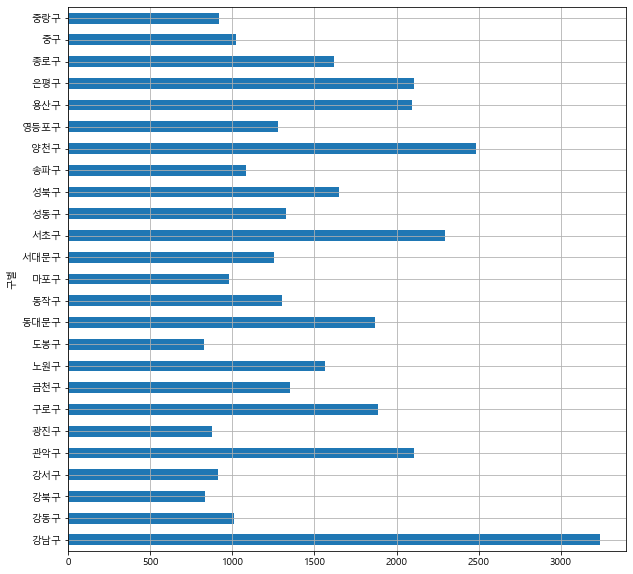

In [76]:
# 각 구별로 cctv대수가 얼마나 차이가 나는지 시각화 작업을 통해서 학인 1
plt.figure(figsize=(10,10))
data_result["소계"].plot(kind='barh',grid=True)

plt.show()

<Figure size 720x720 with 0 Axes>

<BarContainer object of 25 artists>

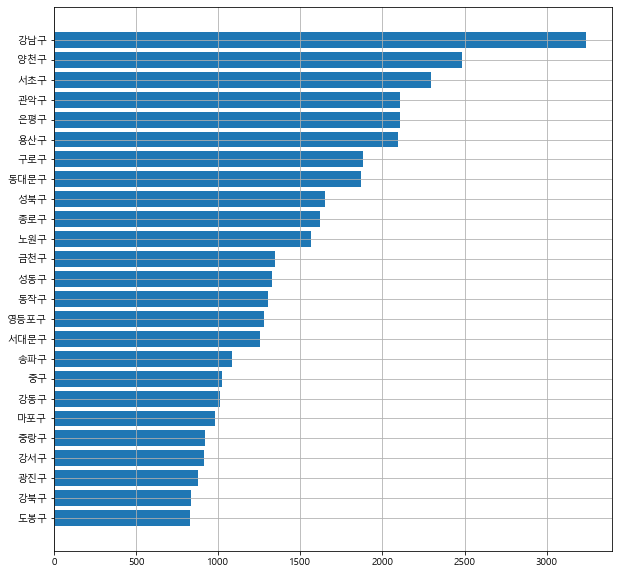

In [77]:
# 각 구별로 cctv대수가 얼마나 차이가 나는지 시각화 작업을 통해서 학인 2
plt.figure(figsize=(10,10))
sort_cctv = data_result["소계"].sort_values()
plt.barh(sort_cctv.index,sort_cctv) # x축과 y축설정
plt.grid()
plt.show()